In [159]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('ggplot')
import seaborn as sns

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6) #adjusts the configuration of the plots we will create




In [160]:
#Reading the data
df=pd.read_csv('movies.csv')

In [161]:
#Looking at the data
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [162]:
#Lets see if there is any missing data
for col in df.columns:
    prcnt_missing=np.mean(df[col].isnull())
    print(f"{col} - {prcnt_missing}%")
    

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [163]:
len(df['budget'][df['budget'].isnull()])

#there are 2171 NaN data among 7668 data so we are going to write average of budget instead of them.

2171

In [164]:
len(df['gross'][df['gross'].isnull()])
#there are 189 NaN data among 7668 data so we are going to write average of gross instead of them.

189

In [165]:
def calculateMean(df):
    total_sum=df.sum().sum()
    size=df.size
    total_nan = df.isnull().sum().sum()
    number_of_number=size-total_nan
    mean=total_sum/number_of_number
    return mean

In [166]:
calculateMean(df['budget']) #this is the average of the budget

35589876.192650534

In [167]:
calculateMean(df['gross']) #this is the average of the gross

78500541.01778312

In [168]:
df['budget'].fillna(value=calculateMean(df['budget']),inplace=True) #nan yerine ortalama sayıyı yazdık.!!

In [169]:
df['gross'].fillna(value=calculateMean(df['gross']),inplace=True) #nan yerine ortalama sayıyı yazdık.!!

In [170]:
len(df['budget'][df['budget'].isnull()]) #there is no NaN data anymore


0

In [171]:
len(df['gross'][df['gross'].isnull()]) #there is no NaN data anymore

0

In [172]:
#Lets see if there is any missing data
for col in df.columns:
    prcnt_missing=np.mean(df[col].isnull())
    print(f"{col} - {prcnt_missing}%")
    

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.0%
gross - 0.0%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [173]:
#the other empty datas are unusable so we need to delete them
df.dropna(inplace=True)

In [174]:
#Lets see if there is any missing data
for col in df.columns:
    prcnt_missing=np.mean(df[col].isnull())
    print(f"{col} - {prcnt_missing}%")

#There is no NaN data anymore...


name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [175]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,1.900000e+07,4.699877e+07,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4.500000e+06,5.885311e+07,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,1.800000e+07,5.383751e+08,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3.500000e+06,8.345354e+07,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6.000000e+06,3.984634e+07,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,8.000000e+07,4.614216e+08,Beijing Diqi Yinxiang Entertainment,149.0
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,3.558988e+07,3.661000e+03,Prowess Pictures,98.0
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,3.558988e+07,4.133780e+05,Pryor Entertainment,120.0
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35.0,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5.000000e+03,7.850054e+07,Notis Studio,78.0


In [176]:
#Dtypes of columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
             ...   
country      object
budget      float64
gross       float64
company      object
runtime     float64
Length: 15, dtype: object

In [177]:
#I want to change the data type of columns from float64  to int64

df['score']=df['score'].astype('int64')
df['votes']=df['votes'].astype('int64')
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')
df['runtime']=df['runtime'].astype('int64')

In [178]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6,3700,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000,461421559,Beijing Diqi Yinxiang Entertainment,149
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5,2400,Scott Teems,Scott Teems,Shea Whigham,United States,35589876,3661,Prowess Pictures,98
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5,294,Scott Pryor,Scott Pryor,Scott Pryor,United States,35589876,413378,Pryor Entertainment,120
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6,35,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000,78500541,Notis Studio,78


In [179]:
df.sort_values(by=['gross'],inplace=False,ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,I Want You,R,Crime,1998,"October 30, 1998 (United Kingdom)",6,2900,Michael Winterbottom,Eoin McNamee,Rachel Weisz,United Kingdom,35589876,1672,Polygram Filmed Entertainment,87
2906,Pusher,Not Rated,Crime,1996,"August 30, 1996 (Denmark)",7,37000,Nicolas Winding Refn,Jens Dahl,Kim Bodnia,Denmark,35589876,1605,Balboa Entertainment,110
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6,5200,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,35589876,1400,British Broadcasting Corporation (BBC),103
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5,735,John Swab,John Swab,Ron Perlman,United States,35589876,682,Roxwell Films,93


In [180]:
pd.set_option('display.max_rows',10) # if you want to see full data you can change the number as None

In [181]:
df=df.sort_values(by=['gross'],inplace=False,ascending=False)

In [182]:
#If there is a duplicated data we are going to drop it
df['company'].drop_duplicates()

5445             Twentieth Century Fox
7445                    Marvel Studios
6663                         Lucasfilm
7480              Walt Disney Pictures
6653                Universal Pictures
                     ...              
820     Manfred Durniok Filmproduktion
6030                      Process Film
5524               Cinema Libre Studio
2906              Balboa Entertainment
3203                          Daybreak
Name: company, Length: 2339, dtype: object

In [183]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,I Want You,R,Crime,1998,"October 30, 1998 (United Kingdom)",6,2900,Michael Winterbottom,Eoin McNamee,Rachel Weisz,United Kingdom,35589876,1672,Polygram Filmed Entertainment,87
2906,Pusher,Not Rated,Crime,1996,"August 30, 1996 (Denmark)",7,37000,Nicolas Winding Refn,Jens Dahl,Kim Bodnia,Denmark,35589876,1605,Balboa Entertainment,110
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6,5200,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,35589876,1400,British Broadcasting Corporation (BBC),103
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5,735,John Swab,John Swab,Ron Perlman,United States,35589876,682,Roxwell Films,93


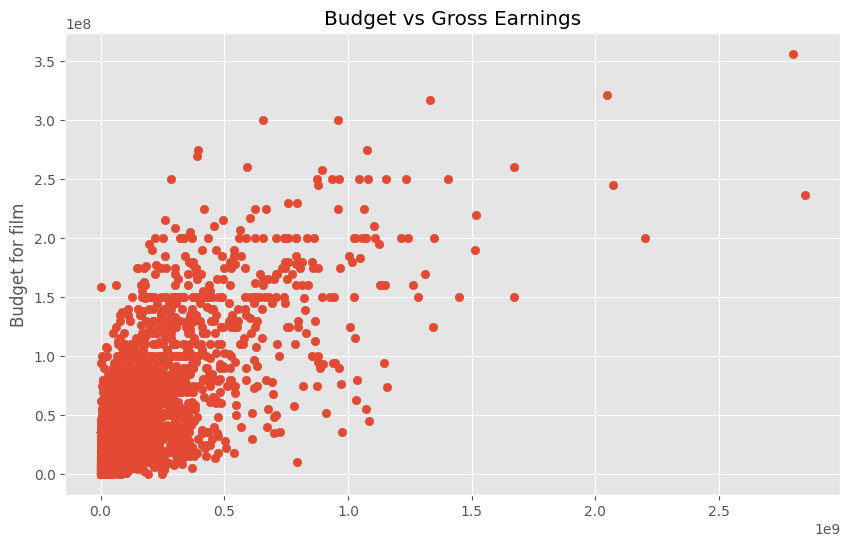

In [184]:

#Scatter plot with budget vs gross

plt.scatter(x=df['gross'],y=df['budget'])
plt.title('Budget vs Gross Earnings')

plt.xlabel=('Gross Earnings')
plt.ylabel('Budget for film')


plt.show()

<AxesSubplot: xlabel='budget', ylabel='gross'>

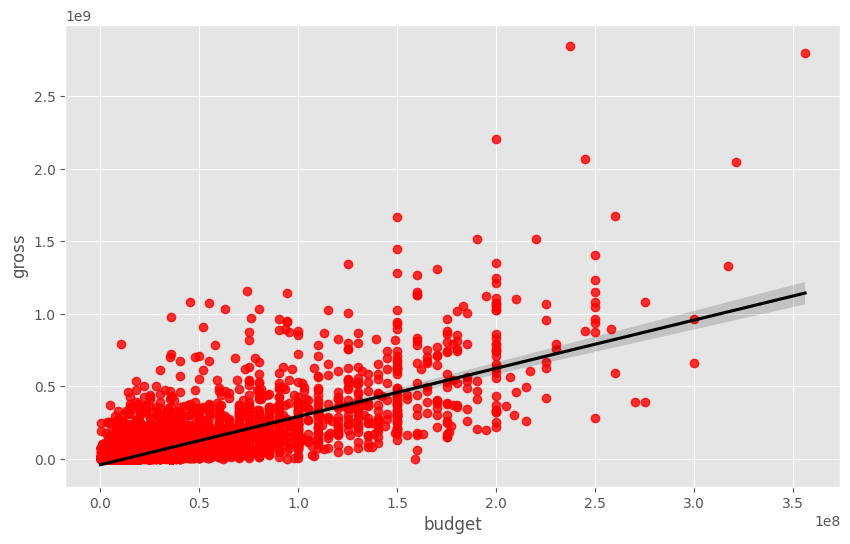

In [185]:
#Seaborn for regression plot

sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":"red"},line_kws={"color":"black"})

In [186]:
#Lets start looking at correlation
df.corr(method='pearson') #pearson,kendall,spearman

C:\Users\Alptekin\AppData\Local\Temp\ipykernel_9340\3930092871.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson') #pearson,kendall,spearman


,year,score,votes,budget,gross,runtime
year,1.000000,0.101771,0.226895,0.269153,0.254266,0.120676
score,0.101771,1.000000,0.396052,0.059590,0.176310,0.384008
votes,0.226895,0.396052,1.000000,0.421252,0.629322,0.309366
budget,0.269153,0.059590,0.421252,1.000000,0.712614,0.266056
gross,0.254266,0.176310,0.629322,0.712614,1.000000,0.241628
runtime,0.120676,0.384008,0.309366,0.266056,0.241628,1.000000


In [187]:
#High correlation between budget and gros


C:\Users\Alptekin\AppData\Local\Temp\ipykernel_9340\156931150.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=df.corr()


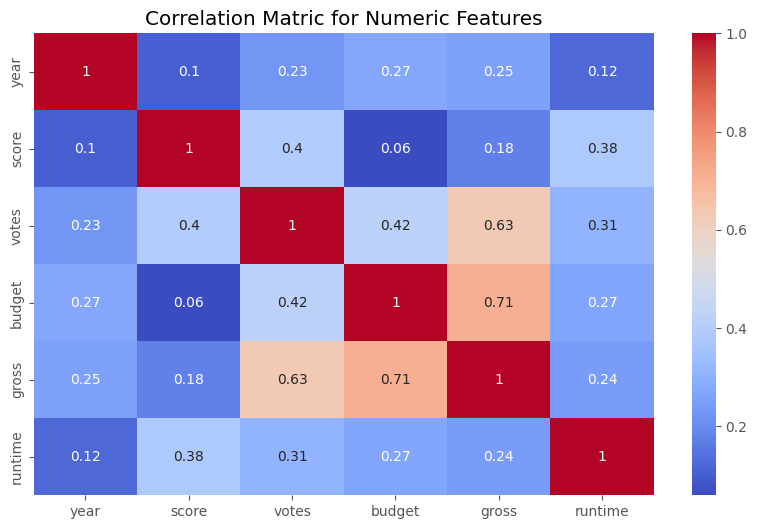

In [188]:
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm")
plt.title('Correlation Matric for Numeric Features')

plt.show()

In [190]:
#Looks at Company
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


In [192]:
df_numerized = df.copy()

for col in df_numerized.columns:
    if(df_numerized[col].dtype == 'object'):
        df_numerized[col]=df_numerized[col].astype('category')
        df_numerized[col]=df_numerized[col].cat.codes
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,527,5,0,2009,688,7,1100000,1137,1756,2283,55,237000000,2847246203,2208,162
7445,529,5,0,2019,180,8,903000,160,729,2192,55,356000000,2797501328,1571,181
3045,6811,5,6,1997,696,7,1100000,1137,1756,1560,55,200000000,2201647264,2208,194
6663,5075,5,0,2015,690,7,876000,1107,2518,508,55,245000000,2069521700,1505,138
7244,530,5,0,2018,189,8,897000,160,729,2192,55,321000000,2048359754,1571,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,2656,6,5,1998,2995,6,2900,1918,1259,2112,54,35589876,1672,1829,87
2906,4338,3,5,1996,518,7,37000,2013,1933,1473,11,35589876,1605,327,110
3818,3319,6,4,2000,1103,6,5200,717,1104,2268,54,35589876,1400,463,103
7580,4600,3,5,2019,1814,5,735,1423,2176,2228,55,35589876,682,1948,93


In [193]:
df


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,I Want You,R,Crime,1998,"October 30, 1998 (United Kingdom)",6,2900,Michael Winterbottom,Eoin McNamee,Rachel Weisz,United Kingdom,35589876,1672,Polygram Filmed Entertainment,87
2906,Pusher,Not Rated,Crime,1996,"August 30, 1996 (Denmark)",7,37000,Nicolas Winding Refn,Jens Dahl,Kim Bodnia,Denmark,35589876,1605,Balboa Entertainment,110
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6,5200,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,35589876,1400,British Broadcasting Corporation (BBC),103
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5,735,John Swab,John Swab,Ron Perlman,United States,35589876,682,Roxwell Films,93


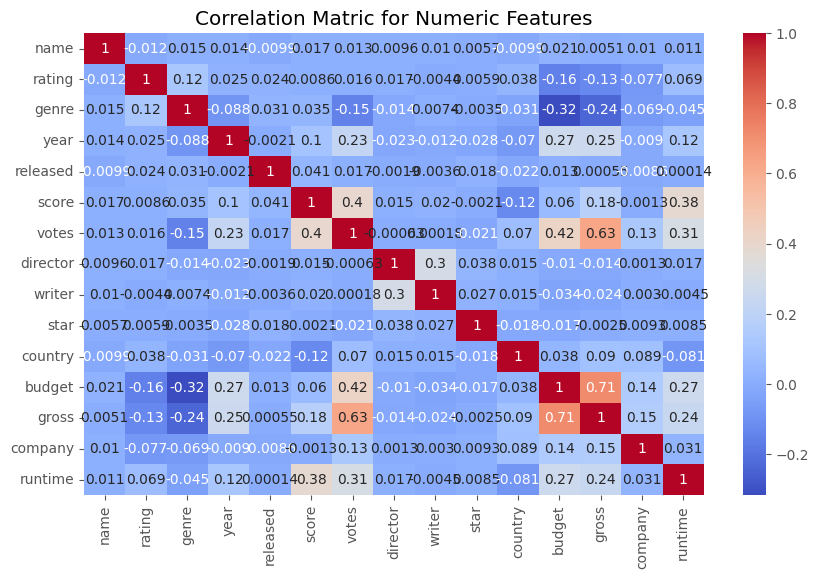

In [194]:
correlation_matrix=df_numerized.corr()
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm")
plt.title('Correlation Matric for Numeric Features')

plt.show()

In [196]:
df_numerized.corr().head(n=15)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.011924,0.015300,0.013514,-0.009906,0.017068,0.013180,0.009608,0.010217,0.005685,-0.009939,0.020930,0.005076,0.010073,0.011151
rating,-0.011924,1.000000,0.117566,0.024989,0.024319,0.008611,0.016086,0.017205,-0.004387,0.005905,0.037738,-0.156307,-0.129394,-0.076807,0.069089
genre,0.015300,0.117566,1.000000,-0.088172,0.030625,0.035132,-0.148420,-0.013508,0.007351,-0.003525,-0.031485,-0.316752,-0.238328,-0.068678,-0.044631
year,0.013514,0.024989,-0.088172,1.000000,-0.002088,0.101771,0.226895,-0.022765,-0.012318,-0.027691,-0.070266,0.269153,0.254266,-0.009026,0.120676
released,-0.009906,0.024319,0.030625,-0.002088,1.000000,0.041469,0.016877,-0.001868,-0.003569,0.018026,-0.022109,0.013331,0.000546,-0.008570,0.000145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
country,-0.009939,0.037738,-0.031485,-0.070266,-0.022109,-0.122972,0.069582,0.015245,0.014937,-0.017626,1.000000,0.038440,0.090463,0.089006,-0.081464
budget,0.020930,-0.156307,-0.316752,0.269153,0.013331,0.059590,0.421252,-0.010377,-0.033614,-0.017162,0.038440,1.000000,0.712614,0.144105,0.266056
gross,0.005076,-0.129394,-0.238328,0.254266,0.000546,0.176310,0.629322,-0.014105,-0.023703,-0.002512,0.090463,0.712614,1.000000,0.152488,0.241628
company,0.010073,-0.076807,-0.068678,-0.009026,-0.008570,-0.001311,0.129596,0.001337,0.003035,0.009317,0.089006,0.144105,0.152488,1.000000,0.030941


In [199]:
corr_mat=df_numerized.corr()
corr_pairs=corr_mat.unstack()
corr_pairs

name     name        1.000000
         rating     -0.011924
         genre       0.015300
         year        0.013514
         released   -0.009906
                       ...   
runtime  country    -0.081464
         budget      0.266056
         gross       0.241628
         company     0.030941
         runtime     1.000000
Length: 225, dtype: float64

In [200]:
sorted_pairs=corr_pairs.sort_values()
sorted_pairs

genre    budget    -0.316752
budget   genre     -0.316752
genre    gross     -0.238328
gross    genre     -0.238328
rating   budget    -0.156307
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [201]:
high_correlation=sorted_pairs[(sorted_pairs)>0.5]

In [203]:
pd.set_option('display.max_rows',None)

In [204]:
high_correlation


gross     votes       0.629322
votes     gross       0.629322
budget    gross       0.712614
gross     budget      0.712614
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
#As a result votes and budget have the highest correlation to gross earnings.